# Лабораторная работа №3
## Виполнил Студент группы 17-AC
## Смирнова Оксана 




### Вариант №2


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

from scipy import interp
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (auc, roc_curve, 
                             precision_recall_curve, 
                             average_precision_score)

from sklearn import datasets
from sklearn.linear_model import perceptron
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from matplotlib.pylab import rc, plot

df = pd.read_csv(r'C:\autos.csv', encoding = 'latin1')
df

## 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

#### даты обхода 
#### имя:" имя " автомобиля
#### продавец: частный или дилер
#### тип предложения
#### Цена : цена по объявлению на продажу автомобиля
#### abtest
#### Тип авто
#### год регистрации: в каком году автомобиль был впервые зарегистрирован
#### коробка передач
#### powerPS : мощность автомобиля в л. с.
#### модель
#### километр : сколько километров проехал автомобиль
#### месяц регистрации : в каком месяце автомобиль был впервые зарегистрирован
#### вид топлива
#### марка
#### не отремонтированные повреждения: если автомобиль имеет повреждения, которые еще не отремонтированы
#### Дата создания : дату, на которую объявление на eBay было создано
#### Кол-во фотографии: количество фотографий в объявлении (к сожалению, это поле содержит везде 0 и, таким образом, бесполезно (ошибка в crawler!) )
#### индекс
#### Последний раз видел в сети : когда обходчик увидел это объявление в последний раз в сети
#### Поля lastSeen и dateCreated могут быть использованы для оценки продолжительности пребывания автомобиля, по крайней мере, в сети перед его продажей.

## 2. Удалите дубликаты строк в наборе данных;приведите размер набора данных до и после данной операции

In [2]:
df.shape

(371528, 20)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

In [4]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [5]:
df.tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21
371527,2016-03-07 19:39:19,BMW_M135i_vollausgestattet_NP_52.720____Euro,privat,Angebot,28990,control,limousine,2013,manuell,320,m_reihe,50000,8,benzin,bmw,nein,2016-03-07 00:00:00,0,73326,2016-03-22 03:17:10


In [6]:
df = df.drop_duplicates()
df = df.dropna()
df = df.drop(['dateCrawled','offerType','dateCreated','postalCode','lastSeen','name','model'], axis = 1)
df.shape

(260952, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260952 entries, 3 to 371527
Data columns (total 13 columns):
seller                 260952 non-null object
price                  260952 non-null int64
abtest                 260952 non-null object
vehicleType            260952 non-null object
yearOfRegistration     260952 non-null int64
gearbox                260952 non-null object
powerPS                260952 non-null int64
kilometer              260952 non-null int64
monthOfRegistration    260952 non-null int64
fuelType               260952 non-null object
brand                  260952 non-null object
notRepairedDamage      260952 non-null object
nrOfPictures           260952 non-null int64
dtypes: int64(6), object(7)
memory usage: 27.9+ MB


In [8]:
df.head()

,seller,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,nrOfPictures
3,privat,1500,test,kleinwagen,2001,manuell,75,150000,6,benzin,volkswagen,nein,0
4,privat,3600,test,kleinwagen,2008,manuell,69,90000,7,diesel,skoda,nein,0
5,privat,650,test,limousine,1995,manuell,102,150000,10,benzin,bmw,ja,0
6,privat,2200,test,cabrio,2004,manuell,109,150000,8,benzin,peugeot,nein,0
7,privat,0,test,limousine,1980,manuell,50,40000,7,benzin,volkswagen,nein,0


## 3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

In [9]:
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'nrOfPictures']
categorial:  ['seller', 'abtest', 'vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage']


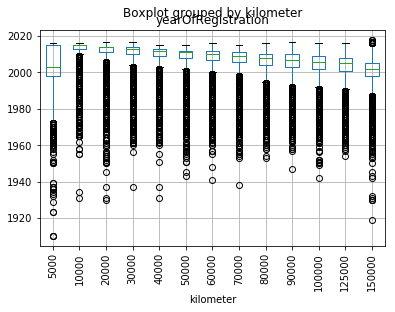

In [10]:
df.boxplot(column='yearOfRegistration',by='kilometer',rot=90)
plt.show()

In [11]:
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'nrOfPictures']
categorial:  ['seller', 'abtest', 'vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage']


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260952 entries, 3 to 371527
Data columns (total 13 columns):
seller                 260952 non-null object
price                  260952 non-null int64
abtest                 260952 non-null object
vehicleType            260952 non-null object
yearOfRegistration     260952 non-null int64
gearbox                260952 non-null object
powerPS                260952 non-null int64
kilometer              260952 non-null int64
monthOfRegistration    260952 non-null int64
fuelType               260952 non-null object
brand                  260952 non-null object
notRepairedDamage      260952 non-null object
nrOfPictures           260952 non-null int64
dtypes: int64(6), object(7)
memory usage: 27.9+ MB


In [13]:
# нормализуем
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()

,seller,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,nrOfPictures
3,privat,0.000015,test,kleinwagen,0.842593,manuell,0.00375,1.000000,0.500000,benzin,volkswagen,nein,0.0
4,privat,0.000036,test,kleinwagen,0.907407,manuell,0.00345,0.586207,0.583333,diesel,skoda,nein,0.0
5,privat,0.000007,test,limousine,0.787037,manuell,0.00510,1.000000,0.833333,benzin,bmw,ja,0.0
6,privat,0.000022,test,cabrio,0.870370,manuell,0.00545,1.000000,0.666667,benzin,peugeot,nein,0.0
7,privat,0.000000,test,limousine,0.648148,manuell,0.00250,0.241379,0.583333,benzin,volkswagen,nein,0.0


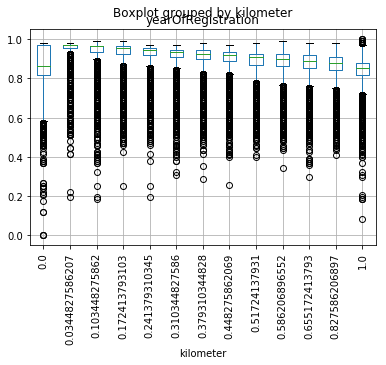

In [14]:
df.boxplot(column='yearOfRegistration',by='kilometer',rot=90)
plt.show()

## 4. Выполните замену категориальных признаков;выберите и обоснуйте способ замены

In [15]:
for i in categorial_columns:
    print(i,': ', df[i].unique())

seller :  ['privat' 'gewerblich']
abtest :  ['test' 'control']
vehicleType :  ['kleinwagen' 'limousine' 'cabrio' 'kombi' 'suv' 'bus' 'coupe' 'andere']
gearbox :  ['manuell' 'automatik']
fuelType :  ['benzin' 'diesel' 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
brand :  ['volkswagen' 'skoda' 'bmw' 'peugeot' 'mazda' 'nissan' 'renault' 'ford'
 'mercedes_benz' 'seat' 'honda' 'fiat' 'mini' 'opel' 'smart' 'audi'
 'alfa_romeo' 'subaru' 'mitsubishi' 'hyundai' 'volvo' 'lancia' 'porsche'
 'citroen' 'toyota' 'kia' 'chevrolet' 'dacia' 'suzuki' 'daihatsu'
 'chrysler' 'jaguar' 'rover' 'jeep' 'saab' 'daewoo' 'land_rover' 'trabant'
 'lada']
notRepairedDamage :  ['nein' 'ja']


In [16]:
# выделим бинарные и небинарные признаки
binary_columns = [i for i in categorial_columns if len(df[i].unique()) == 2]
nonbinary_columns = [i for i in categorial_columns if len(df[i].unique()) > 2]

# для бинарных заменим значения на 1 и 0
for col in binary_columns:
    for i, unic_item in enumerate(df[col].unique()):
        df[col] = df[col].replace(to_replace=[unic_item], value=[i])
        
# для не бинарых применим dummy-кодирование
df_nonbinary = pd.get_dummies(df[nonbinary_columns])
df.drop(nonbinary_columns, axis=1, inplace=True)
df = pd.concat([df_nonbinary, df] , axis=1)

print(df.shape)
df.head()

(260952, 64)


,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_andere,fuelType_benzin,...,seller,price,abtest,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,notRepairedDamage,nrOfPictures
3,0,0,0,0,1,0,0,0,0,1,...,0,0.000015,0,0.842593,0,0.00375,1.000000,0.500000,0,0.0
4,0,0,0,0,1,0,0,0,0,0,...,0,0.000036,0,0.907407,0,0.00345,0.586207,0.583333,0,0.0
5,0,0,0,0,0,0,1,0,0,1,...,0,0.000007,0,0.787037,0,0.00510,1.000000,0.833333,1,0.0
6,0,0,1,0,0,0,0,0,0,1,...,0,0.000022,0,0.870370,0,0.00545,1.000000,0.666667,0,0.0
7,0,0,0,0,0,0,1,0,0,1,...,0,0.000000,0,0.648148,0,0.00250,0.241379,0.583333,0,0.0


## 5.Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

                        vehicleType_andere  vehicleType_bus  \
vehicleType_andere                1.000000        -0.026893   
vehicleType_bus                  -0.026893         1.000000   
vehicleType_cabrio               -0.022873        -0.089969   
vehicleType_coupe                -0.020165        -0.079318   
vehicleType_kleinwagen           -0.044742        -0.175990   
vehicleType_kombi                -0.041961        -0.165051   
vehicleType_limousine            -0.053198        -0.209250   
vehicleType_suv                  -0.018219        -0.071661   
fuelType_andere                   0.018149        -0.003882   
fuelType_benzin                  -0.029147        -0.216371   
fuelType_cng                      0.006537         0.053421   
fuelType_diesel                   0.029044         0.213791   
fuelType_elektro                  0.008251        -0.003926   
fuelType_hybrid                   0.000905        -0.007015   
fuelType_lpg                     -0.004109         0.00

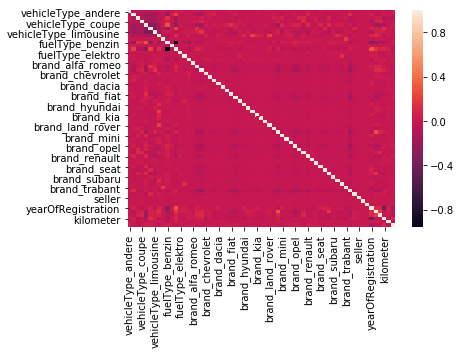

In [17]:
corr_matrix = df.drop(['nrOfPictures'], axis=1).corr()
sns.heatmap(corr_matrix);
print(corr_matrix)
plt.show()

## 6.Заполните пропущенные значения в данных

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260952 entries, 3 to 371527
Data columns (total 64 columns):
vehicleType_andere        260952 non-null uint8
vehicleType_bus           260952 non-null uint8
vehicleType_cabrio        260952 non-null uint8
vehicleType_coupe         260952 non-null uint8
vehicleType_kleinwagen    260952 non-null uint8
vehicleType_kombi         260952 non-null uint8
vehicleType_limousine     260952 non-null uint8
vehicleType_suv           260952 non-null uint8
fuelType_andere           260952 non-null uint8
fuelType_benzin           260952 non-null uint8
fuelType_cng              260952 non-null uint8
fuelType_diesel           260952 non-null uint8
fuelType_elektro          260952 non-null uint8
fuelType_hybrid           260952 non-null uint8
fuelType_lpg              260952 non-null uint8
brand_alfa_romeo          260952 non-null uint8
brand_audi                260952 non-null uint8
brand_bmw                 260952 non-null uint8
brand_chevrolet          

## 7.Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказаннымс учётом p-value

In [19]:
from  sklearn import linear_model
# линейная регрессия, LASSO регуляризатор.
X, y = df.drop(['price'], axis=1), df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

reg = linear_model.Lasso (alpha = 0.1)
reg.fit (X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
reg.coef_

array([  1.20266971e+05,   1.20266971e+05,   1.20266971e+05,
         1.20266971e+05,   1.20266971e+05,   1.20266971e+05,
         1.20266971e+05,   1.20266971e+05,  -1.09335494e+05,
        -1.09335494e+05,  -1.09335494e+05,  -1.09335494e+05,
        -1.09335494e+05,  -1.09335494e+05,  -1.09335494e+05,
         1.08575816e+06,   1.08575816e+06,   1.08575816e+06,
         1.08575816e+06,   1.08575816e+06,   1.08575816e+06,
         1.08575816e+06,   1.08575816e+06,   1.08575816e+06,
         1.08575816e+06,   1.08575816e+06,   1.08575816e+06,
         1.08575816e+06,   1.08575816e+06,   1.08575816e+06,
         1.08575816e+06,   1.08575816e+06,   1.08575816e+06,
         1.08575816e+06,   1.08575816e+06,   1.08575816e+06,
         1.08575816e+06,   1.08575816e+06,   1.08575816e+06,
         1.08575816e+06,   1.08575816e+06,   1.08575816e+06,
         1.08575816e+06,   1.08575816e+06,   1.08575816e+06,
         1.08575816e+06,   1.08575816e+06,   1.08575816e+06,
         1.08575816e+06,

In [31]:
xt = reg.predict(X_test)
print(xt[:10])

[  2.55834311e-06   1.78932678e-04  -3.23986169e-05   2.31631566e-05
   1.28515065e-04  -4.68175858e-06   5.70071861e-05   1.79221388e-05
   1.34629430e-04  -3.18605453e-06]


In [32]:
print(y_test[:10])

173420    0.000010
182741    0.000279
271616    0.000010
218173    0.000013
361460    0.000159
45771     0.000030
297004    0.000013
58119     0.000027
304305    0.000080
183986    0.000007
Name: price, dtype: float64


In [33]:
print(xt[:10]-y_test[:10])

173420   -0.000007
182741   -0.000100
271616   -0.000042
218173    0.000011
361460   -0.000030
45771    -0.000034
297004    0.000044
58119    -0.000009
304305    0.000055
183986   -0.000010
Name: price, dtype: float64


In [34]:
reg.intercept_

-1096689.6348992127

In [35]:
from  sklearn import linear_model
# линейная регрессия без использования регуляризаторов;

X, y = df.drop(['price'], axis=1), df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

reg = linear_model.LinearRegression()

reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
reg.coef_

array([  1.20266971e+05,   1.20266971e+05,   1.20266971e+05,
         1.20266971e+05,   1.20266971e+05,   1.20266971e+05,
         1.20266971e+05,   1.20266971e+05,  -1.09335494e+05,
        -1.09335494e+05,  -1.09335494e+05,  -1.09335494e+05,
        -1.09335494e+05,  -1.09335494e+05,  -1.09335494e+05,
         1.08575816e+06,   1.08575816e+06,   1.08575816e+06,
         1.08575816e+06,   1.08575816e+06,   1.08575816e+06,
         1.08575816e+06,   1.08575816e+06,   1.08575816e+06,
         1.08575816e+06,   1.08575816e+06,   1.08575816e+06,
         1.08575816e+06,   1.08575816e+06,   1.08575816e+06,
         1.08575816e+06,   1.08575816e+06,   1.08575816e+06,
         1.08575816e+06,   1.08575816e+06,   1.08575816e+06,
         1.08575816e+06,   1.08575816e+06,   1.08575816e+06,
         1.08575816e+06,   1.08575816e+06,   1.08575816e+06,
         1.08575816e+06,   1.08575816e+06,   1.08575816e+06,
         1.08575816e+06,   1.08575816e+06,   1.08575816e+06,
         1.08575816e+06,

In [37]:
reg.intercept_

-1096689.6348992127

In [38]:
from scipy.stats import *
corr={}
corr['pearson'], _ = stats.pearsonr(xt,y_test)
corr['spearman'], _ = stats.spearmanr(xt,y_test)
print(corr['pearson'])
print(corr['spearman'])

0.0148607120179
0.674803835071
